In [1]:
import pandas as pd

src_path = 'data/hacizkoyma_coordinates.xlsx'
dst_path = 'data/raw_data.csv'

hacizkoyma_df = pd.read_excel(src_path)

### Drop infrequent labels

In [2]:
label_counts = hacizkoyma_df.TARGET.value_counts() 
to_drop = label_counts.loc[label_counts < 10].index.tolist()
to_drop

['tal', 'bor ', 'l', 'vbek', ' bor', 'bot']

In [3]:
mapping = {k: None for k in to_drop}

In [4]:
hacizkoyma_df.TARGET = hacizkoyma_df.TARGET.replace(mapping)

In [5]:
hacizkoyma_df.TARGET.value_counts()

bor     3229
kur     1517
al      1419
avek     939
tar      586
tut      397
dos      321
tbor     316
vbor     177
bvek      36
val       11
Name: TARGET, dtype: int64

#### Save label mapping

In [21]:
label_mapping = {v: i for i,v in enumerate(hacizkoyma_df.TARGET.value_counts().index)}

In [22]:
label_mapping

{'bor': 0,
 'kur': 1,
 'al': 2,
 'avek': 3,
 'tar': 4,
 'tut': 5,
 'dos': 6,
 'tbor': 7,
 'vbor': 8,
 'bvek': 9,
 'val': 10}

In [23]:
import json
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

### Save dataset

In [6]:
# Carry target to newlines
prev_target = hacizkoyma_df.TARGET.shift(1)
is_newline = hacizkoyma_df.TOKEN == 'NEWLINE'
hacizkoyma_df.loc[is_newline, 'TARGET'] = prev_target.loc[is_newline]

In [7]:
hacizkoyma_df.FILENAME = hacizkoyma_df.FILENAME.fillna(method = 'ffill')

emptyrate = hacizkoyma_df.groupby('FILENAME').apply(lambda x: x.TARGET.isnull().mean())
islabeled =  emptyrate != 1.0

labeled_docs = list(islabeled[islabeled].index)

In [8]:
len(labeled_docs)

162

### Create separate files for test and tr&val

In [24]:
"""import random
random.seed(42)

train_size = int(len(labeled_docs)*0.7)
val_size = int(len(labeled_docs)*0.15)
test_size = len(labeled_docs) - train_size - val_size

random.shuffle(labeled_docs)
test_docs = labeled_docs[-test_size:]
trval_docs = labeled_docs[:-test_size]

hacizkoyma_df.loc[hacizkoyma_df.FILENAME.isin(trval_docs)].to_csv(dst_path, index = False, header = None)
hacizkoyma_df.loc[hacizkoyma_df.FILENAME.isin(test_docs)].to_csv('data/test.csv', index = False, header = None)
"""

### Save labeled docs

In [9]:
hacizkoyma_df.loc[hacizkoyma_df.FILENAME.isin(labeled_docs)].to_csv(dst_path, index = False, header = None)

### Show labeled tags

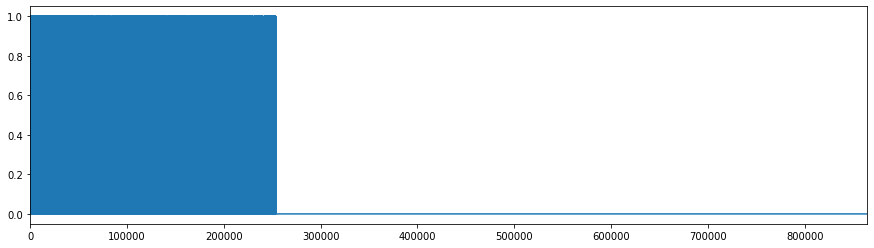

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,4))
(~hacizkoyma_df.TARGET.isnull()).astype('int').plot()
plt.show()

### Show labeled docs

In [14]:
emptyrate = hacizkoyma_df.groupby('FILENAME').apply(lambda x: x.TARGET.isnull().mean())
islabeled =  emptyrate != 1.0

In [78]:
emptyrate.loc['0a9a7e51-9b1d-4ed5-8469-a0c469054e32.pdf']

0.9132653061224489

In [75]:
islabeled[islabeled == False]

FILENAME
00d1996b-e635-4a9f-9769-7e28f22a3c8f.pdf    False
0a018113-9ddc-484c-b301-08472e40946d.pdf    False
0a031a57-d18f-4b10-8136-d237963d0430.pdf    False
0a03254b-967d-48d1-ad71-fcdb1bdf6afb.pdf    False
0a043a2a-d1dc-4cca-8fb2-85a4643126c8.pdf    False
0a061266-44b8-45b1-8389-6c06a30d7a3c.pdf    False
0a0621cf-98cd-41ab-8ad2-2e83980d551c.pdf    False
0a10cab9-21b7-416c-8c04-fd6a02ce44f2.pdf    False
0a10f441-db91-4093-a8fe-85e37b5cc5a5.pdf    False
0a110c1c-688a-4c31-866d-4408473d8a68.pdf    False
0a1366ec-b607-4b69-95de-b67bd8648e43.pdf    False
0a17f039-c969-4779-892a-78a0668bd73b.pdf    False
0a17f63d-9328-4c65-a27e-4863197fe01c.pdf    False
0a19b80b-601d-46f5-aa27-315db6b35554.pdf    False
0a221490-5075-4809-8c89-b3b16c42de25.pdf    False
0a2718f5-4995-43ec-a1af-1cde17447f1e.pdf    False
0a2ebfc2-8e82-436a-ac77-5875ee0bdfec.pdf    False
0a3109dc-01b0-4bb4-abe4-8016720336e8.pdf    False
0a3533b2-7df6-4a58-9890-7607c6ed3858.pdf    False
0a35a51a-d6d0-4388-954b-193ba7ca6292.pdf 

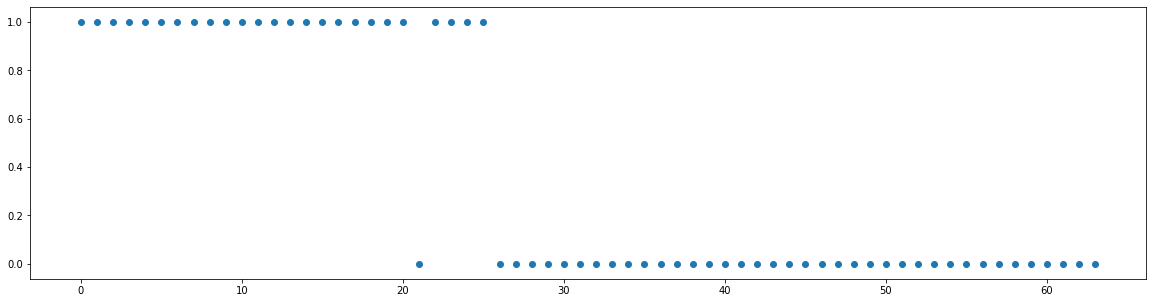

In [15]:
import numpy as np

plt.figure(figsize = (20,5))
plt.scatter(x = np.arange(len(islabeled)), y = islabeled.astype(int).values)